# Notebook's content
1. [Importing libraries](#0)
2. [Split dataset](#1)
3. [Loading data](#2)
3. [Dataset overview](#3)
4. [Images pre-processing](#4)
5. [CNN Model](#5)

<a id="0"></a> <br>
# Importing libraries

In [1]:
# First we will import neccessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Lambda
from PIL import Image

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Split dataset into train , val and test sets
<a id="1"></a> <br>

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset directory
dataset_dir = '/kaggle/input/arabic-letters/alphabet'

# Output directory for train, validation, and test sets
output_dir = '/kaggle/working/dataset'
os.makedirs(output_dir, exist_ok=True)

# Splitting the dataset into train, validation, and test sets
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Splitting the dataset into train, val, and test sets
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)
    
    # Split images into train, val, and test sets
    train_images, val_test_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(val_test_images, test_size=0.7, random_state=42)
    
    # Create class directories in train, val, and test sets
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_val_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)
    
    # Copy images to their respective directories
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(class_train_dir, image)
        shutil.copyfile(src, dst)
        
    for image in val_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(class_val_dir, image)
        shutil.copyfile(src, dst)
        
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(class_test_dir, image)
        shutil.copyfile(src, dst)


<a id="2"></a> <br>

In [3]:
#load train data
path = "/kaggle/working/dataset/train"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft = []
for key in key_value.keys():
    for j in key_value[key]:
        dft.append([key,os.path.join(path, key, j)])
df1 = pd.DataFrame(dft,columns=('label','path'))

<a id="3"></a> <br>

In [4]:
df1

,label,path
0,ل,/kaggle/working/dataset/train/ل/l245.png
1,ل,/kaggle/working/dataset/train/ل/l254.png
2,ل,/kaggle/working/dataset/train/ل/l65.png
3,ل,/kaggle/working/dataset/train/ل/l32.png
4,ل,/kaggle/working/dataset/train/ل/l41.png
...,...,...
6084,ظ,/kaggle/working/dataset/train/ظ/dhad45.png
6085,ظ,/kaggle/working/dataset/train/ظ/dhad148.png
6086,ظ,/kaggle/working/dataset/train/ظ/dhad189.jpg
6087,ظ,/kaggle/working/dataset/train/ظ/dhad133.png


In [5]:
df1.describe()

,label,path
count,6089,6089
unique,28,6089
top,ص,/kaggle/working/dataset/train/ل/l245.png
freq,275,1


In [6]:
#load val data
path2 = "/kaggle/working/dataset/val"
key_value= dict()
for i in os.listdir(path2):
    if os.path.isdir(os.path.join(path2, i)):
        key_value[i] = os.listdir(os.path.join(path2, i))
dfv = []
for key in key_value.keys():
    for j in key_value[key]:
        dfv.append([key,os.path.join(path2, key, j)])
df2 = pd.DataFrame(dfv,columns=('label','path2'))
df2

,label,path2
0,ل,/kaggle/working/dataset/val/ل/l104.png
1,ل,/kaggle/working/dataset/val/ل/l93.png
2,ل,/kaggle/working/dataset/val/ل/l20.png
3,ل,/kaggle/working/dataset/val/ل/l10.png
4,ل,/kaggle/working/dataset/val/ل/l271.jpg
...,...,...
769,ظ,/kaggle/working/dataset/val/ظ/dhad165.jpg
770,ظ,/kaggle/working/dataset/val/ظ/dhad1.png
771,ظ,/kaggle/working/dataset/val/ظ/dhad5.png
772,ظ,/kaggle/working/dataset/val/ظ/dhad79.png



<a id="4"></a> <br>
# Images pre-processing

In [7]:
def readimg(path):
    img = cv.imread(path)

    img = cv.resize(img,(80,80))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.bitwise_not(img)
    return img

In [8]:
#processing train data

import multiprocessing

# Create a Pool with 4 worker processes
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    images = p.map(readimg, df1['path'])
train_images=np.array(images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
train_labels = le.fit_transform(df1['label'])

In [9]:
#processing val data

import multiprocessing

# Create a Pool with 4 worker processes
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    images = p.map(readimg, df2['path2'])
val_images=np.array(images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
val_labels = le.fit_transform(df2['label'])

# CNN Model
<a id="5"></a> <br>

In [10]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(80, 80, 1)),
    
    keras.layers.Conv2D(526, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),    
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(28, activation="softmax")
])


es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.compile(optimizer=opt,
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_images,train_labels, epochs=30, batch_size=32,validation_data=(val_images, val_labels))

Epoch 1/30
191/191 [==============================] - 21s 47ms/step - loss: 1.4098 - accuracy: 0.5989 - val_loss: 0.5576 - val_accuracy: 0.8269
Epoch 2/30
191/191 [==============================] - 8s 41ms/step - loss: 0.2922 - accuracy: 0.9271 - val_loss: 0.2441 - val_accuracy: 0.9432
Epoch 3/30
191/191 [==============================] - 8s 41ms/step - loss: 0.1148 - accuracy: 0.9782 - val_loss: 0.1662 - val_accuracy: 0.9574
Epoch 4/30
191/191 [==============================] - 8s 41ms/step - loss: 0.0541 - accuracy: 0.9916 - val_loss: 0.1351 - val_accuracy: 0.9690
Epoch 5/30
191/191 [==============================] - 8s 41ms/step - loss: 0.0270 - accuracy: 0.9969 - val_loss: 0.0951 - val_accuracy: 0.9767
Epoch 6/30
191/191 [==============================] - 8s 41ms/step - loss: 0.0121 - accuracy: 0.9993 - val_loss: 0.0764 - val_accuracy: 0.9793
Epoch 7/30
191/191 [==============================] - 8s 41ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0720 - val_accuracy: 0.978

# Test set pre-processing

In [12]:
path = "/kaggle/working/dataset/test"
key_value= dict()
for i in os.listdir(path2):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft = []
for key in key_value.keys():
    for j in key_value[key]:
        dft.append([key,path+'/'+key+'/'+j])
dft = pd.DataFrame(dft,columns=('label','path'))

In [13]:
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    test_images = p.map(readimg, dft['path'])

In [14]:
test_images=np.array(test_images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
test_labels = le.fit_transform(dft['label'])

In [15]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)

58/58 [==============================] - 1s 16ms/step
Accuracy: 0.9784366576819407


In [16]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(test_labels, predicted_labels)

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Assuming y_true is the true labels and y_pred is the predicted labels
print(classification_report(test_labels, predicted_labels))

test_labels = le.inverse_transform(test_labels)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.98      0.99        64
           2       0.98      0.95      0.97        66
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        66
           5       1.00      0.97      0.98        66
           6       1.00      1.00      1.00        68
           7       0.96      0.98      0.97        65
           8       0.98      0.98      0.98        64
           9       0.96      0.97      0.96        68
          10       0.98      0.93      0.95        56
          11       1.00      1.00      1.00        66
          12       0.98      0.98      0.98        65
          13       0.99      0.99      0.99        84
          14       1.00      1.00      1.00        82
          15       0.94      1.00      0.97        66
          16       1.00      0.95      0.98        66
          17       0.97    

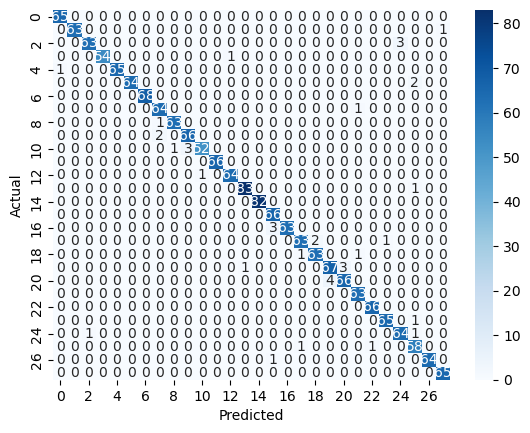

In [17]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Saving the model

In [18]:
model.save('/kaggle/working/arabic1.h5')
